In [405]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import pandas as pd

In [406]:
df = pd.read_excel("SharkAttack_clean.xlsx")

## Fatality x Activity

In [407]:
df_no_unknown = df[(df["Fatal Y/N"] != "U") & (df["Activity"] != "unqualified")]

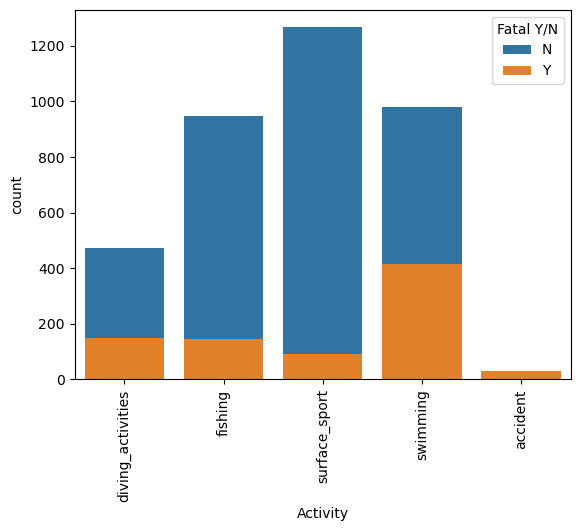

In [408]:
sns.countplot(df_no_unknown, x="Activity", hue="Fatal Y/N", dodge=False)
plt.xticks(rotation=90)
plt.show()

In [409]:
df_crosstab = pd.crosstab(df_no_unknown["Fatal Y/N"], df_no_unknown.Activity)

In [410]:
df_crosstab

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,9,473,947,1266,981
Y,29,149,147,90,415


In [411]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

(359.5905758335372, 1.4896549798408316e-76)

In [412]:
association(df_crosstab, method="cramer")

0.2824935634088099

In [413]:
df_crosstab_normalized = df_crosstab.apply(lambda x: x / x.sum(), axis=0)
round(df_crosstab_normalized * 100, 2)

Activity,accident,diving_activities,fishing,surface_sport,swimming
Fatal Y/N,,,,,
N,23.68,76.05,86.56,93.36,70.27
Y,76.32,23.95,13.44,6.64,29.73


In [414]:
df_crosstab_normalized = round(df_crosstab_normalized.transpose()*100,2)

In [415]:
df_crosstab_normalized.sort_values(by="N")

Fatal Y/N,N,Y
Activity,,
accident,23.68,76.32
swimming,70.27,29.73
diving_activities,76.05,23.95
fishing,86.56,13.44
surface_sport,93.36,6.64


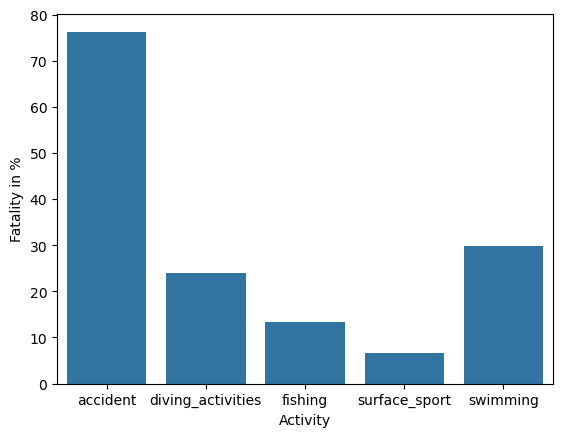

In [416]:
sns.barplot(df_crosstab_normalized, x="Activity",y="Y")
plt.ylabel("Fatality in %")
#plt.xticks(rotation=90)
plt.show()

## Attacks over time

In [417]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by year and count occurrences for each value in 'Fatal Y/N'
df_grouped = df.groupby([df['Date'].dt.to_period('Y'), 'Fatal Y/N']).size().unstack(fill_value=0)

In [418]:
df_grouped = df_grouped.drop("U", axis=1)

In [422]:
df_grouped = df_grouped.reset_index().rename(columns={'index': 'Date'})
df_grouped['Date'] = df_grouped['Date'].astype('datetime64[ns]')
df_grouped = df_grouped[df_grouped['Date'].dt.year >= 1975]
df_grouped = df_grouped.groupby((df_grouped['Date'].dt.year // 1) * 1).sum(numeric_only=True).reset_index()

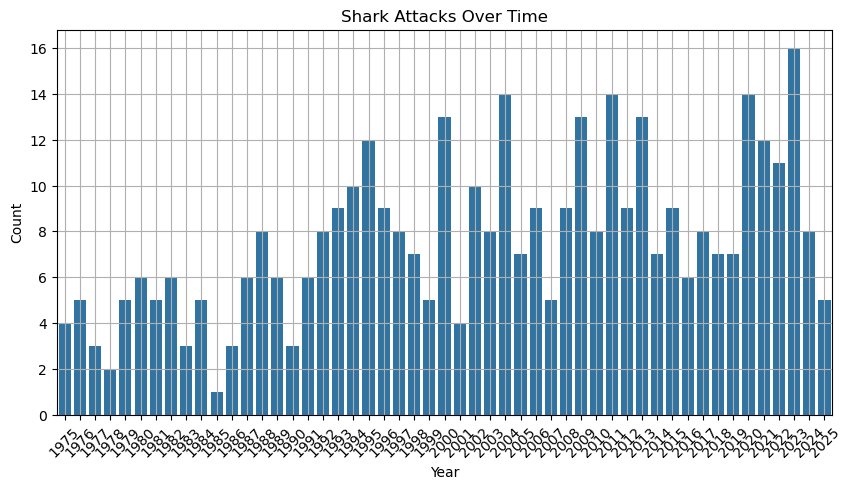

In [423]:
# Convert 'Date' column to string for plotting
df_grouped['Date'] = df_grouped['Date'].astype(str)

plt.figure(figsize=(10, 5))
#sns.lineplot(data=df_grouped, x="Date", y="N", label="Non-Fatal", marker="o")
sns.barplot(data=df_grouped, x="Date", y="Y")

# Improve readability
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Shark Attacks Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

c:\Users\Martijn\anaconda3\envs\datasci_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


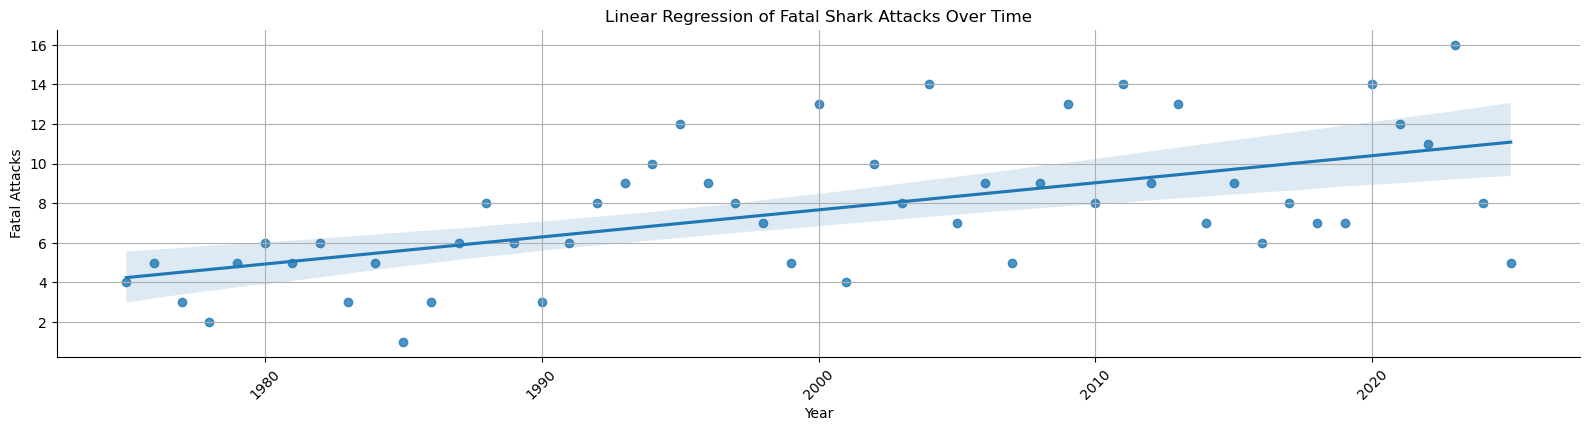

In [433]:
# Convert 'Date' column to numeric type for plotting
df_grouped['Date'] = pd.to_numeric(df_grouped['Date'])

sns.lmplot(data=df_grouped, x='Date', y='Y', aspect=4, height=4)
plt.xlabel("Year")
plt.ylabel("Fatal Attacks")
plt.title("Linear Regression of Fatal Shark Attacks Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [424]:
df_grouped.corr()

Fatal Y/N,Date,N,Y
Fatal Y/N,,,
Date,1.000000,0.767875,0.584620
N,0.767875,1.000000,0.524074
Y,0.584620,0.524074,1.000000


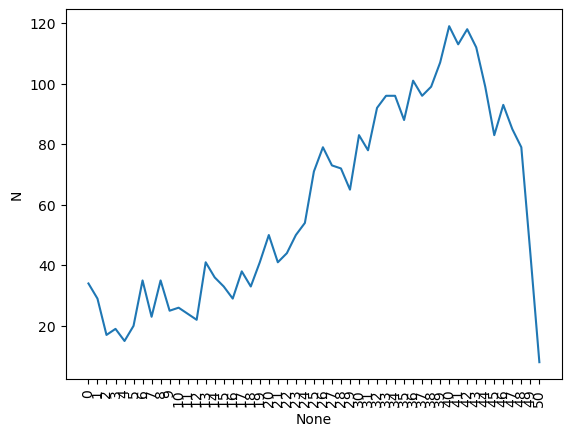

In [426]:
sns.lineplot(data=df_grouped, x=df_grouped.index.astype(str), y="N")
plt.xticks(rotation=90)
plt.show()